In [ ]:
"""
Hand Sign Detection via TensorFlow

This project needs user to follow instructions precisely to run. 
Thus I recommend users to open the ReadMe file and
follow its instructions + comments of this very jupyter notebook
to run the project successfully.

This file ("hsd_tf_packages") includes pip installs, while the other one,
("hsd_tf_codes_only") does not install any package and just runs the project.

It is highly recommended to make a Python virtual environment on your machine,
then run the projects. In the ReadMe file, I put a brief explanation about it.

All the instructions and codes are developed based on Windows. Nontheless, it
can be run on any platform with minor changes that I tried to mention in the comments.
"""

In [ ]:
!pip install opencv-python

In [ ]:
import os
import time
import cv2
import uuid



# Signs Labelling

# All the considered signs should be mentioned in below list
sign_labels = ['like', 'dislike', 'victory', 'hi']
# number of images per sign (will be used for the train and test)
imgs_per_sign = 5

# dir for directory
imgs_dir = os.path.join('project_hsd', 'material', 'all_images', 'unlabeled_imgs')

if not os.path.exists(imgs_dir):
    !mkdir {imgs_dir}
for sign in sign_labels:
    dirs = os.path.join(imgs_dir, sign)
    if not os.path.exists(dirs):
        !mkdir {dirs}
        

# Taking the pictures
# This phase needs the user speed to pose 
# for pictures spontaneously.
# A good lighting also runs a long way.

# The quality of images is one of the most
# important factors to develop an accurate model

for sign in sign_labels:
    pic = cv2.VideoCapture(0)
    print('You have 10 seconds to pose for taking {} pictures '
          'for {}'.format(imgs_per_sign, sign))
    time.sleep(10)
    for pic_num in range(imgs_per_sign):
        print('Taking picture {}'.format(pic_num))
        bool_val, img = pic.read()
        pic_name = os.path.join(imgs_dir, sign, sign + '.' + '{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(pic_name, img)
        cv2.imshow('frame', img)
        time.sleep(3)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
pic.release()
cv2.destroyAllWindows()

In [ ]:
!pip install --upgrade pyqt5 lxml

In [ ]:
# Cloning a github repository which is a labeling tool 

lab_tool_dir = os.path.join('project_hsd', 'labeling_tool')

if not os.path.exists(lab_tool_dir):
    !mkdir {lab_tool_dir}
    !git clone https://github.com/tzutalin/labelImg {lab_tool_dir}

In [ ]:
!cd {lab_tool_dir} && pyrcc5 -o libs/resources.py resources.qrc
!cd {lab_tool_dir} && python labelImg.py

In [ ]:
# Preparing folders for the TensorFlow and our system underlying model
# Underlying model is a model than our object detection project uses as an offset
# In fact, after completing our model, we will generate our own object detection system
# which is specified for our handsign detection system.

# In case that you restart the kernel which you probably will
# import os again and run this cell
import os

developed_model = 'handsign_od_model' 
underlying_model = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
underlying_model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
glossary_generation_tf = 'convert_glossary_tf.py'
sign_map = 'label_map.pbtxt'

dirs = {
    'material_dir': os.path.join('project_hsd', 'material'),
    'conversion_dir': os.path.join('project_hsd','py_file'),
    'tf_dir': os.path.join('project_hsd','tf_model'),
    'glossary_dir': os.path.join('project_hsd', 'material','glossary'),
    'img_dir': os.path.join('project_hsd', 'material','all_images'),
    'my_model_dir': os.path.join('project_hsd', 'material','hsd_model'),
    'underlying_model_dir': os.path.join('project_hsd', 'material','underlying_trained_model'),
    'checkpoint_dir': os.path.join('project_hsd', 'material','hsd_model',developed_model), 
    'export_dir': os.path.join('project_hsd', 'material','hsd_model',developed_model, 'export'), 
    'js_export_dir':os.path.join('project_hsd', 'material','hsd_model',developed_model, 'js_export'), 
    'lite_export_dir':os.path.join('project_hsd', 'material','hsd_model',developed_model, 'lite_export'), 
    'PROTOC_PATH':os.path.join('project_hsd','protoc')
 }

files = {
    'model_pipline':os.path.join('project_hsd', 'material','hsd_model', developed_model, 'pipeline.config'),
    'glossary_generation': os.path.join(dirs['conversion_dir'], glossary_generation_tf), 
    'signs_map': os.path.join(dirs['glossary_dir'], sign_map)
}


for path in dirs.values():
    if not os.path.exists(path):
        !mkdir {path}

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(dirs['tf_dir'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {dirs['tf_dir']}

In [ ]:
# Installing Tensorflow Object Detection 

url = "https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {dirs['PROTOC_PATH']}
!cd {dirs['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(dirs['PROTOC_PATH'], 'bin'))   
!cd project_hsd/tf_model/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd project_hsd/tf_model/research/slim && pip install -e . 

In [ ]:
approved_installation = os.path.join(dirs['tf_dir'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# This approves the complete installation of the TensorFlow 
# Please check the hsd_project ReadMe
!python {approved_installation}

In [ ]:
# if previous cell returned ModuleNotFoundError:
# No Module named 'tensorflow'
# It mostly needs two runs
!pip install tensorflow --upgrade

In [ ]:
# No Module named 'matplotlib'
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [ ]:
# No Module named 'PIL'
!pip install pillow

In [ ]:
# No Module named 'yaml' error from 
# approved_installation
!pip install pyyaml

In [ ]:
import object_detection

# No module named 'object_detection' error solution:
# restart the kernel

In [ ]:
# This cell download our underlying model. It is practically
# a trained model which we develop our model on it as our base

# If you confronted a HtmlEror (as I did) just download it from
# my repository and move and extract it in the underlying_model_dir in:
# project_hsd , material , underlying_model

# wget.download(underlying_model_url)
# !move {underlying_model+'.tar.gz'} {dirs['underlying_model_dir']}
# !cd {dirs['underlying_model_dir']} && tar -zxvf {underlying_model+'.tar.gz'}

In [ ]:
# Developing a label map for our signs 

sign_labs = [{'name':'like', 'id':1}, {'name':'dislike', 'id':2}, 
             {'name':'victory', 'id':3}, {'name':'hi', 'id':4}]

with open(files['signs_map'], 'w') as f:
    for label in sign_labs:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
# Creating a file format named TFRecords
# This Python file convert our glossary to the TFRecords
# This type is available to train an object detection model

if not os.path.exists(files['glossary_generation']):
    !git clone https://github.com/demianAdli/glossary_conversion {dirs['conversion_dir']}

In [ ]:
!pip install pytz

In [ ]:
# Running the cloned script
# This would make a training and testing record
# These would train our model

!python {files['glossary_generation']} -x {os.path.join(dirs['img_dir'], 'img_train')} -l {files['signs_map']} -o {os.path.join(dirs['glossary_dir'], 'img_train.record')} 
!python {files['glossary_generation']} -x {os.path.join(dirs['img_dir'], 'img_test')} -l {files['signs_map']} -o {os.path.join(dirs['glossary_dir'], 'img_test.record')} 



In [ ]:
# Copying the underlying model (already trained) to our training folder
# This configure the way that our model will train data for 
# our specific task (here handsign detection)
# This is in fact the architecture of our underlying model
# It can be changed based on the model that we choose

!copy {os.path.join(dirs['underlying_model_dir'], underlying_model, 'pipeline.config')} {os.path.join(dirs['checkpoint_dir'])}


In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

set_model = config_util.get_configs_from_pipeline_file(files['model_pipline'])
set_model

In [ ]:
pipline_setting = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['model_pipline'], "r") as trained_model:                                                                                                                                                                                                                     
    prototype = trained_model.read()                                                                                                                                                                                                                                          
    text_format.Merge(prototype, pipline_setting)  

In [ ]:
pipline_setting.model.ssd.num_classes = len(sign_labs)
pipline_setting.train_config.batch_size = 4
pipline_setting.train_config.fine_tune_checkpoint = os.path.join(dirs['underlying_model_dir'], underlying_model, 'checkpoint', 'ckpt-0')
pipline_setting.train_config.fine_tune_checkpoint_type = "detection"
pipline_setting.train_input_reader.label_map_path= files['signs_map']
pipline_setting.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(dirs['glossary_dir'], 'img_train.record')]
pipline_setting.eval_input_reader[0].label_map_path = files['signs_map']
pipline_setting.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(dirs['glossary_dir'], 'img_test.record')]

In [ ]:
setting_str = text_format.MessageToString(pipline_setting)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['model_pipline'], "wb") as trained_model:                                                                                                                                                                                                                    
    trained_model.write(setting_str) 

In [ ]:
# Training can start now

# Since this takes some time, the best way is 
# not to run it on jupyter notebook since
# it does not show any progress time
# Thus we print the needed commpand ('expression' in this cell) and will open 
# a cmd with the same intrepreter (or virtual environment)
# Paste it there, after 100 steps of training we will see an estimation
# of each step

# You can define the number of steps in the 'expression' variable

model_training = os.path.join(dirs['tf_dir'], 'research', 'object_detection', 'model_main_tf2.py')
expression = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(model_training, dirs['checkpoint_dir'], files['model_pipline'])
print(expression)

In [ ]:
# After copying the 'expression' in the cmd, you'll probably face 
# couple of errors, easy to solve though
# first: Error: ValueError: numpy.ndarray size changed
# Solution: uninstall and install pycocotools 
# pip uninstall pycocotools -y
# pip install pycocotools
# second: ModuleNotFoundError: no module named tensorflow-addons
# Solution: pip install tensorflow-addons
# Thirds: ModuleNotFoundError: no module named gin
# Solution: install an old version of gin:
# pip install gin-config==0.1.1

# Probably good to go now, unless you're using a 
# gpu, in that sense, you should install the cudnn and cuda 
# versions that are compatible with the installed tensorflow
# You have to install them before the training phase

In [ ]:
expression = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(model_training, dirs['checkpoint_dir'],files['model_pipline'], dirs['checkpoint_dir'])
print(expression)
# copying the expression in the cmd returns the performance matrix
# ctrl + c will quit the results there in the cmd
# train and eval folders consist loss matrix and evaluations matrix
# From cmd, you can go to these folders and observe the evaluation
# through tensorboard:
# in cmd look for handsign_od_model where you can find mentioned folders
# heading to train or eval you can do the same thing 
# Type this expression and enter: tensorboard --logdir=.
# This expression returns this url: http://localhost:6006/
# open it in your browser and observe the loss or evaluation matrices based
# on the folder you're in (train and eval)


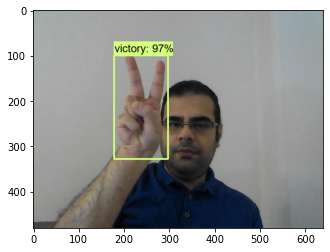

In [66]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
import cv2
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline

# Checking our model performanceby experimenting on the test data
# This runs an image detection

# Assigning our model's pipeline config to the 'our_model'
# in order to develop a detection model
our_model = config_util.get_configs_from_pipeline_file(files['model_pipline'])
hs_detection = model_builder.build(model_config=our_model['model'], is_training=False)


hs_checkpoint = tf.compat.v2.train.Checkpoint(model=hs_detection)
# From material-> hsd_model -> handsign_od_model -> 
# Check the greatest index for ckpt (checkpoint)
# and put it in the below expression (last argument of the join method)
hs_checkpoint.restore(os.path.join(dirs['checkpoint_dir'], 'ckpt-4')).expect_partial()


@tf.function
def obj_detection_func(image):
    image, figures = hs_detection.preprocess(image)
    model_pre_dict = hs_detection.predict(image, figures)
    our_signs = hs_detection.postprocess(model_pre_dict, figures)
    return our_signs


# Choose an image from our test image folder (img_test)
# in order to apply our obj_detection_func on it
classification_factor = label_map_util.create_category_index_from_labelmap(files['signs_map'])
# Copy the image name instead of the below image name
img_dir = os.path.join(dirs['img_dir'], 'img_test', 'victory.433b3c66-f2b9-11eb-a816-685d43928e06.jpg')

# Mapping the image into a numpy array
picture = cv2.imread(img_dir)
np_pic = np.array(picture)

tf_res = tf.convert_to_tensor(np.expand_dims(np_pic, 0), dtype=tf.float32)
our_signs = obj_detection_func(tf_res)

signs_num = int(our_signs.pop('num_detections'))
our_signs = {key: value[0, :signs_num].numpy()
             for key, value in our_signs.items()}
our_signs['signs_num'] = signs_num

# detection_classes should be ints
our_signs['detection_classes'] = our_signs['detection_classes'].astype(np.int64)

sign_set = 1
np_pic_detected = np_pic.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            np_pic_detected,
            our_signs['detection_boxes'],
            our_signs['detection_classes'] + sign_set,
            our_signs['detection_scores'],
            classification_factor,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(np_pic_detected, cv2.COLOR_BGR2RGB))
plt.savefig('victory.png')
plt.show()

In [ ]:
pic = cv2.VideoCapture(0)
pic_width = int(pic.get(cv2.CAP_PROP_FRAME_WIDTH))
pic_height = int(pic.get(cv2.CAP_PROP_FRAME_HEIGHT))

while pic.isOpened():
    ret, frame = pic.read()
    image_np = np.array(frame)

    tf_res = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    our_signs = obj_detection_func(tf_res)

    signs_num = int(our_signs.pop('num_detections'))
    our_signs = {key: value[0, :signs_num].numpy()
                 for key, value in our_signs.items()}
    our_signs['num_detections'] = signs_num

    # detection_classes should be ints.
    our_signs['detection_classes'] = our_signs['detection_classes'].astype(np.int64)

    sign_set = 1
    np_pic_detected = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
        np_pic_detected,
        our_signs['detection_boxes'],
        our_signs['detection_classes'] + sign_set,
        our_signs['detection_scores'],
        classification_factor,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh=.8,
        agnostic_mode=False)

    cv2.imshow('object detection', cv2.resize(np_pic_detected, (800, 600)))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        pic.release()
        cv2.destroyAllWindows()
        break

In [ ]:
# Exporting different types of the trained model:
# Below cell will export the result in the following folder:
# handsign_detection_tensor_flow\project_hsd\material\hsd_model\handsign_od_model\export
# The pipeline.config file is the same as file that we have
# have used in order to apply a pretrained model to develop on, namely
# 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

In [ ]:
# Exporting different types of the trained model

res_export = os.path.join(dirs['tf_dir'], 'research', 'object_detection', 'exporter_main_v2.py ')
expression = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(res_export, files['model_pipline'], dirs['checkpoint_dir'], dirs['export_dir'])
print(expression)
!{expression}

In [ ]:
!pip install tensorflowjs

In [ ]:
# Creating the model's json file 

expression = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(dirs['export_dir'], 'saved_model'), dirs['js_export_dir'])
!{expression}

In [ ]:
# Creating a lite version

res_lite = os.path.join(dirs['tf_dir'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')
expression = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(res_lite, files['model_pipline'], dirs['checkpoint_dir'], dirs['lite_export_dir'])
!{expression}

res_lite_dir = os.path.join(dirs['lite_export_dir'], 'saved_model')
model_lite = os.path.join(dirs['lite_export_dir'], 'saved_model', 'detect.tflite')

expression = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(res_lite_dir, model_lite, )
!{expression}